<a href="https://colab.research.google.com/github/SundharessB/Reinforcement-Learning/blob/main/2348564_CIAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# **Epsilon-Greedy Algorithm**


In [8]:
def random_selection(machine_count, trial_count, exploration_rate):
    slot_rewards = np.zeros(machine_count)
    slot_pulls = np.zeros(machine_count)
    actual_rewards = np.random.rand(machine_count)  # Random true reward probabilities
    total_earned = 0

    for trial in range(trial_count):
        if np.random.rand() < exploration_rate:
            chosen_slot = np.random.randint(0, machine_count)
        else:
            chosen_slot = np.argmax(slot_rewards / (slot_pulls + 1e-5))

        earned = np.random.binomial(1, actual_rewards[chosen_slot])
        slot_pulls[chosen_slot] += 1
        slot_rewards[chosen_slot] += earned
        total_earned += earned

    return slot_rewards, slot_pulls, total_earned

# **UCB Algorithm**


In [9]:
def confidence_interval(machine_count, trial_count):
    slot_rewards = np.zeros(machine_count)
    slot_pulls = np.zeros(machine_count)
    actual_rewards = np.random.rand(machine_count)
    total_earned = 0

    for slot in range(machine_count):
        earned = np.random.binomial(1, actual_rewards[slot])
        slot_pulls[slot] += 1
        slot_rewards[slot] += earned
        total_earned += earned

    for trial in range(machine_count, trial_count):
        ucb_values = slot_rewards / slot_pulls + np.sqrt(2 * np.log(trial + 1) / slot_pulls)
        chosen_slot = np.argmax(ucb_values)
        earned = np.random.binomial(1, actual_rewards[chosen_slot])

        slot_pulls[chosen_slot] += 1
        slot_rewards[chosen_slot] += earned
        total_earned += earned

    return slot_rewards, slot_pulls, total_earned

# **Parameters**


In [27]:
total_slots = 3
total_trials = 100
explore_rate = 0.1


#**Running both the algorithm**

In [28]:
rewards_random, pulls_random, total_random_rewards = random_selection(total_slots, total_trials, explore_rate)
rewards_confidence, pulls_confidence, total_confidence_rewards = confidence_interval(total_slots, total_trials)

# **Results comparison**


In [29]:
comparison_results = {
    "epsilon_greedy": {
        "Total Reward": total_random_rewards,
        "Average Rewards per Slot": rewards_random / (pulls_random + 1e-5),
        "Slot Pulls": pulls_random
    },

    "ucb": {
        "Total Reward": total_confidence_rewards,
        "Average Rewards per Slot": rewards_confidence / (pulls_confidence + 1e-5),
        "Slot Pulls": pulls_confidence
    }
}


In [30]:
comparison_results

{'epsilon_greedy': {'Total Reward': 53,
  'Average Rewards per Slot': array([0.18181802, 0.        , 0.58620683]),
  'Slot Pulls': array([11.,  2., 87.])},
 'ucb': {'Total Reward': 90,
  'Average Rewards per Slot': array([0.84374974, 0.        , 0.99999984]),
  'Slot Pulls': array([32.,  5., 63.])}}

#**inference**
**epsilon_greedy** : the algorithm exploited slot 3 excessivley while barley exploring the other slots.this leads to a biased strategy where the algorithm is stuck in suboptimal behavior

**ucb**:ucb explored slot 1 and 3 more consistently leading to better understanding the reward probablities


# **Visualizing the total rewards**


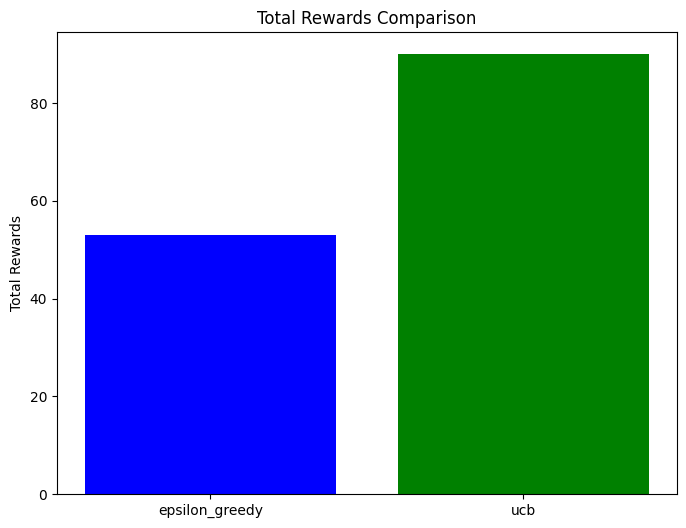

In [33]:
algorithms = ['epsilon_greedy', 'ucb']
total_rewards = [comparison_results[alg]['Total Reward'] for alg in algorithms]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, total_rewards, color=['blue', 'green'])
plt.title('Total Rewards Comparison')
plt.ylabel('Total Rewards')
plt.show()


#**Conclusion**


Upper Confidence Bound algorithm performs better than epsilon greedy in the given scenario.this proves UCB's exploration and exploitation strategy was more effective in identifying high reward slots.